# Prepoznavanje nedostajućih vrijednosti

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("day.csv")

display(df.head())

missing_values = df.isnull().sum()

print("Broj nedostajućih vrijednosti po stupcu:\n", missing_values)

total_missing = missing_values.sum()
if total_missing == 0:
    print("\nNema nedostajućih vrijednosti!")
else:
    print(f"\nBroj nedostajućih vrijednosti je {total_missing}")
    

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Broj nedostajućih vrijednosti po stupcu:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Nema nedostajućih vrijednosti!


U ovom zadatku analizirao sam dataset kako bih utvrdio postoje li nedostajuće vrijednosti. Prvo su podaci učitani iz datoteke "day.csv", a zatim je prikazan pregled prvih nekoliko redaka kako bismo dobili osnovni uvid u strukturu. Nakon toga, korištenjem funkcije isnull().sum() provjereno je koliko nedostajućih vrijednosti ima u svakom stupcu.

# Rekodiranje nedostajućih vrijednosti npr .null. -> „missing“

Ovaj korak nije potreban s obzirom da u ovome setu podataka nema nedostajućih vrijednosti.

In [2]:

missing_values = df.isnull().sum()
total_missing = missing_values.sum()

if total_missing == 0:
    print("\nNema nedostajućih vrijednosti koje treba rekodirati.")
else:
    print("\nPostoje nedostajuće vrijednosti.")
    df.fillna("missing", inplace=True)
    df.replace(".null.", "missing", inplace=True)
    recoded_values_count = (df == "missing").sum()
    print("\nBroj rekodiranih vrijednosti po stupcu:\n", recoded_values_count)
    print("\nNedostajuće vrijednosti su rekodirane.")



Nema nedostajućih vrijednosti koje treba rekodirati.


# Prepoznavanje uniformnih ili nelogičnih distribucija

<Figure size 1000x400 with 0 Axes>

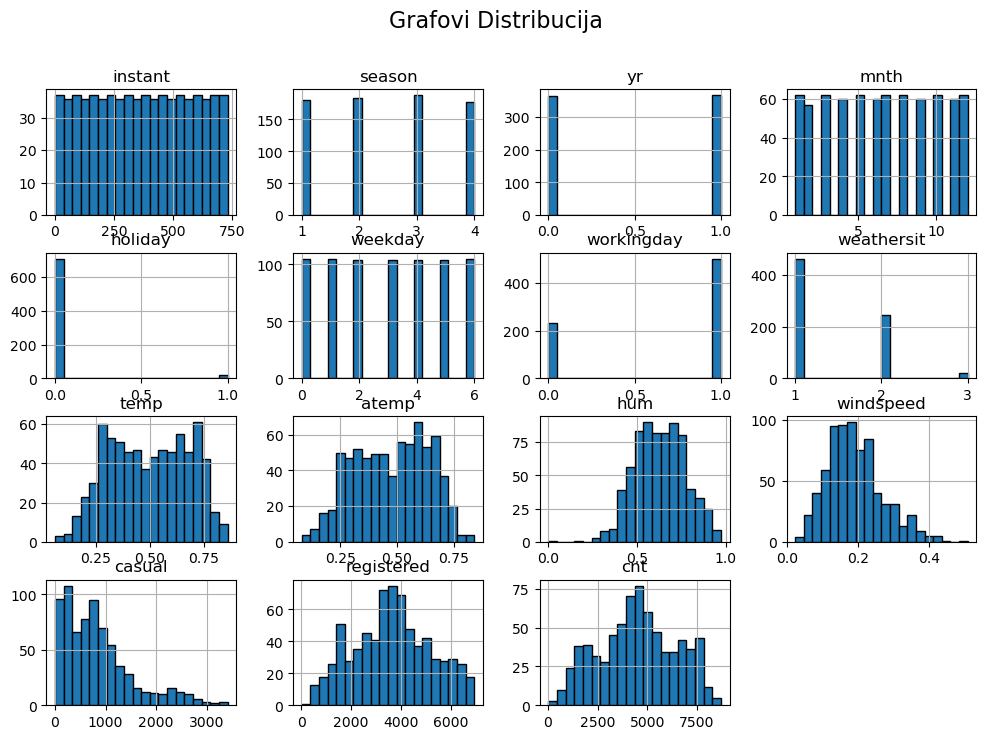

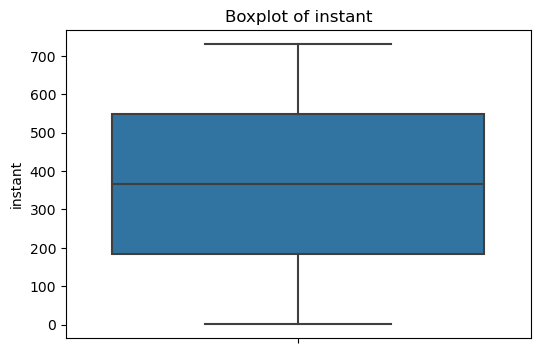

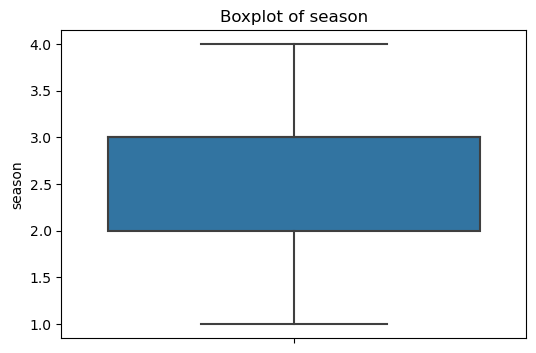

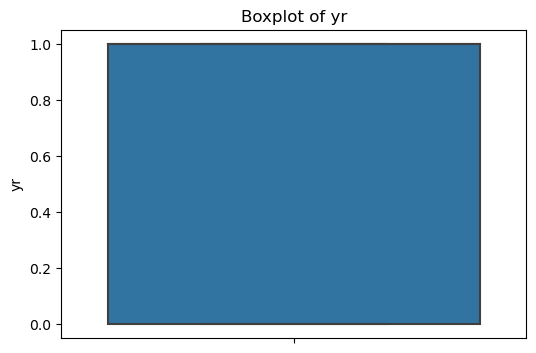

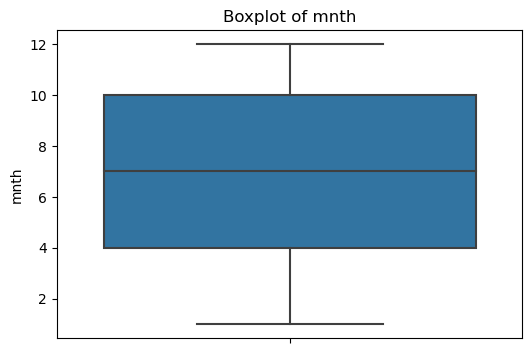

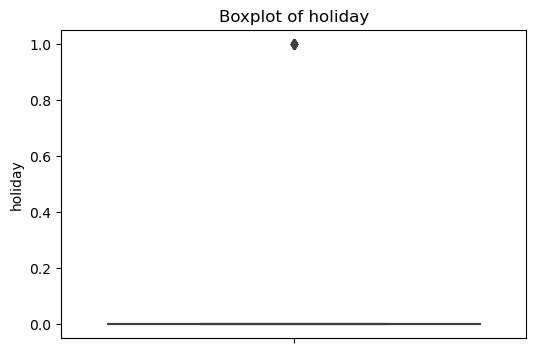

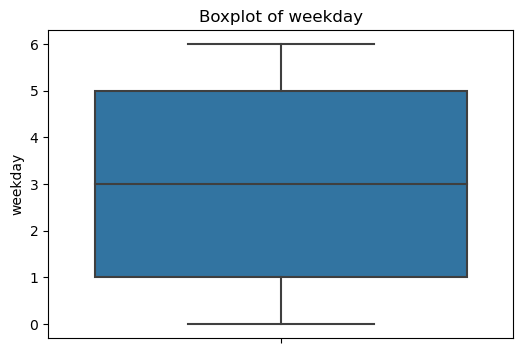

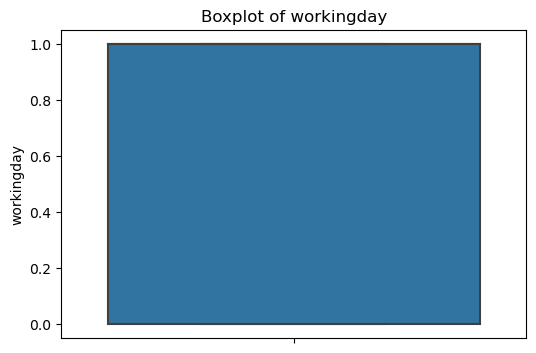

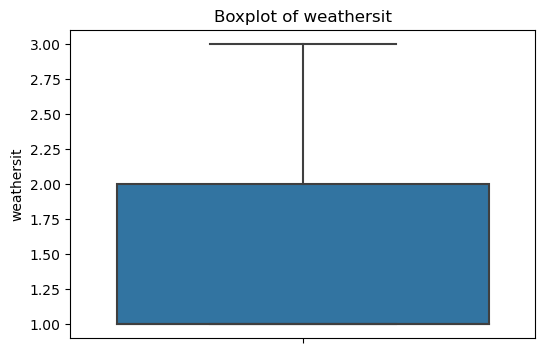

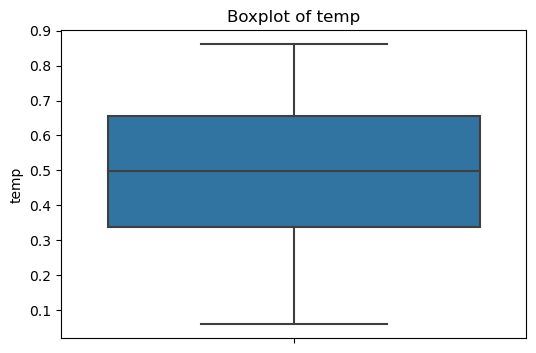

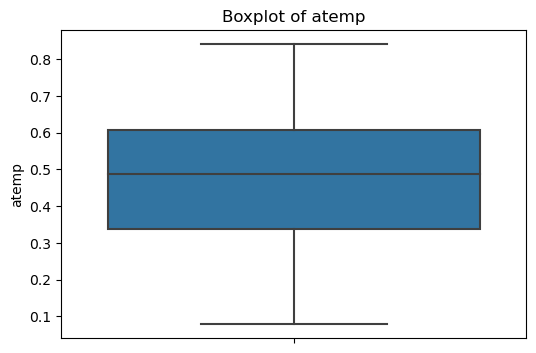

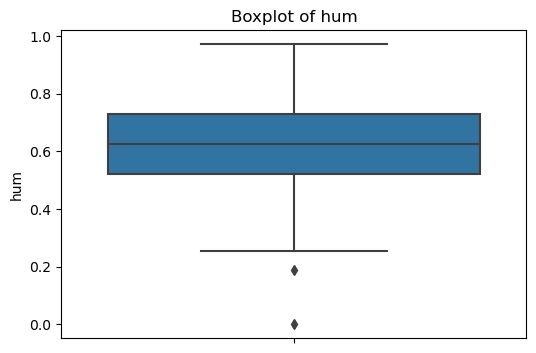

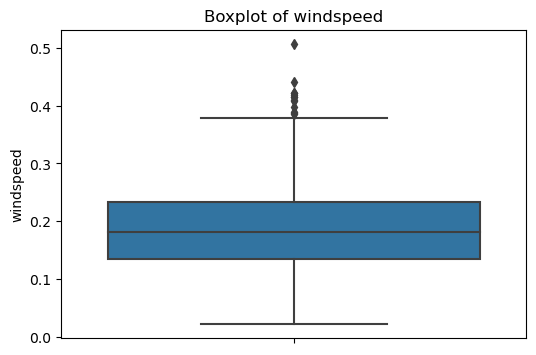

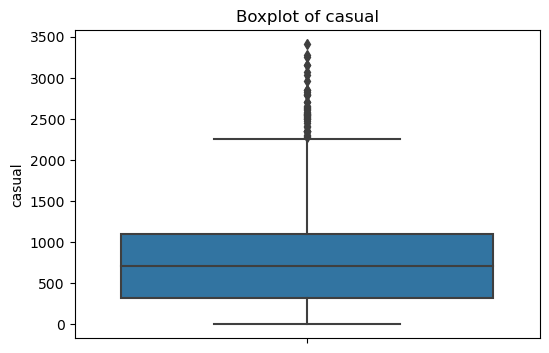

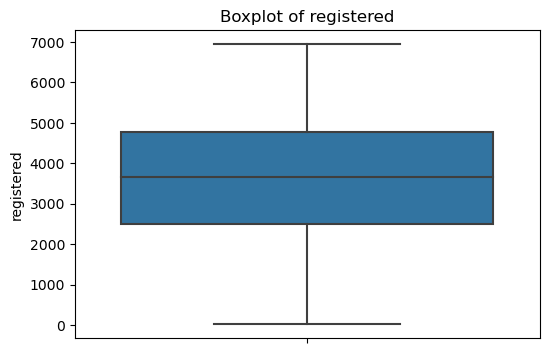

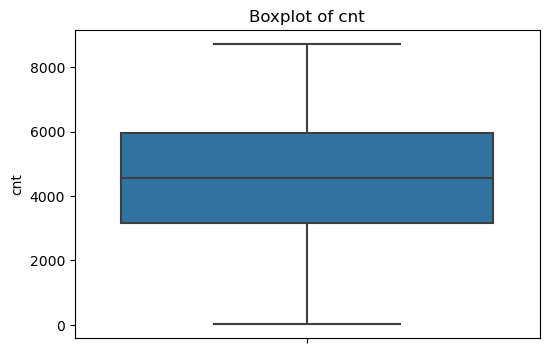

In [4]:

%matplotlib inline  

df = pd.read_csv("day.csv")

numeric_df = df.select_dtypes(include=['number'])

if numeric_df.empty:
    print("Nema numeričkih stupaca!")
else:
    plt.figure(figsize=(10, 4))
    numeric_df.hist(bins=20, figsize=(12, 8), edgecolor='black')
    plt.suptitle("Grafovi Distribucija", fontsize=16)
    plt.show()  
    
    for col in numeric_df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(y=numeric_df[col])
        plt.title(f"Boxplot of {col}")
        plt.show()

Histogrami distribucija

instant – Vrijednosti su ravnomjerno raspoređene, što sugerira da je to jednostavno indeksna varijabla bez posebnog značenja.

season – Očekivano, postoje četiri različite vrijednosti (1-4) koje predstavljaju godišnja doba. Distribucija je ujednačena.

yr – Varijabla ima samo dvije vrijednosti (0 i 1), što odgovara godinama 2011. i 2012.

mnth – Vrijednosti su ravnomjerno raspoređene od 1 do 12, što je očekivano jer označavaju mjesece u godini.

holiday i workingday – Ove varijable su binarne (0 ili 1), što znači da jasno označavaju radne i neradne dane.

weathersit – Ima tri različite kategorije, što odgovara vremenskim uvjetima.

temp, atemp – Obje varijable su kontinuirane i imaju normalnu distribuciju.

hum – Vrijednosti su većinom u srednjem rasponu, ali postoji nekoliko nižih vrijednosti koje bi mogli biti outlieri.

windspeed – Distribucija pokazuje nekoliko ekstremno visokih vrijednosti.

casual i registered – casual ima nešto izraženiju desnu repnu distribuciju, dok je registered više normalno raspoređen.

cnt – Ciljna varijabla je raspoređena slično registered, što znači da broj registriranih korisnika ima veliki utjecaj.

Boxplot analiza
Boxplotovi nam omogućavaju identifikaciju outliera i ukupne raspodjele podataka.

season, mnth, yr, weekday, workingday – Ove varijable nemaju outliere jer su diskretne kategorije.

holiday – Pojavljuje se jedan outlier, ali to je vjerojatno zbog niske učestalosti prazničnih dana.

weathersit – Vrijednosti su ograničene na nekoliko diskretnih kategorija, bez značajnih outliera.

temp, atemp – Vrijednosti su unutar normalnog raspona, nema značajnih odstupanja.

hum – Postoji nekoliko outliera u donjem dijelu distribucije.

windspeed – Ima nekoliko outliera u gornjem dijelu distribucije, što može značiti da postoje ekstremni uvjeti vjetra.

casual – Ima mnogo outliera u gornjem dijelu, što ukazuje na dane s iznimno velikim brojem povremenih korisnika.

registered i cnt – Nema značajnih outliera, distribucija izgleda normalno.

Zaključak

Većina varijabli ima očekivane distribucije bez nelogičnih vrijednosti.

windspeed i hum imaju nekoliko outliera.

casual pokazuje ekstremne vrijednosti, što može utjecati na model ako se ne obradi ispravno.

# Provjeriti / redizajnirati /odrediti ciljnu varijablu i njenu kvalitetu

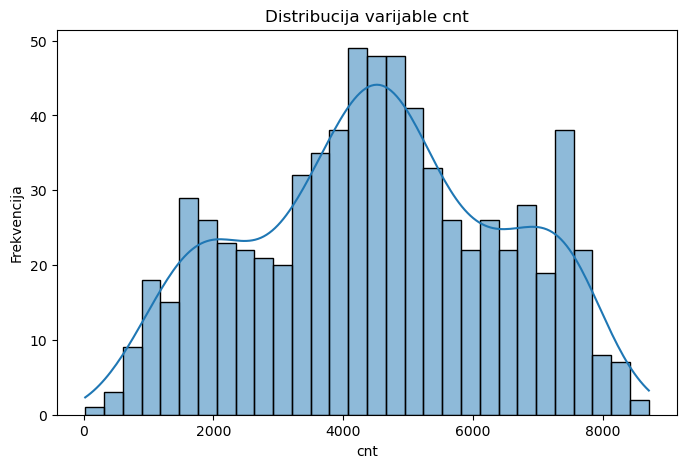

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64


Korelacija ciljane varijable sa ostatkom varijabli:
 cnt           1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
instant       0.628830
temp          0.627494
yr            0.566710
season        0.406100
mnth          0.279977
weekday       0.067443
workingday    0.061156
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
weathersit   -0.297391
Name: cnt, dtype: float64


In [3]:

target_var = 'cnt'

plt.figure(figsize=(8, 5))
sns.histplot(df[target_var], bins=30, kde=True)
plt.title(f"Distribucija varijable {target_var}")
plt.xlabel(target_var)
plt.ylabel("Frekvencija")
plt.show()

display(df[target_var].describe())

correlation_matrix = df.corr()
target_correlation = correlation_matrix[target_var].sort_values(ascending=False)
print("\nKorelacija ciljane varijable sa ostatkom varijabli:\n", target_correlation)



U ovom zadatku analizirao sam varijablu cnt, koja predstavlja ukupan broj iznajmljenih bicikala dnevno. Cilj je bio provjeriti njezinu distribuciju, osnovne statističke metrike i korelaciju s ostalim varijablama.

Distribucija ciljne varijable
Prikazani histogram pokazuje da distribucija varijable cnt približno prati normalnu distribuciju, ali ima blagu pozitivnu nagnutost (right skewed). To znači da postoji nekoliko dana s izuzetno visokim brojem iznajmljivanja.

Osnovne statistike (cnt)

Broj zapisa: 731 (što odgovara otprilike dvije godine dnevnih podataka).
Srednja vrijednost: 4504 iznajmljena bicikla dnevno.
Standardna devijacija: 1937, što znači da postoji značajna varijabilnost između dana.
Minimalna vrijednost: 22 iznajmljena bicikla (vrlo niska aktivnost).
Maksimalna vrijednost: 8714 iznajmljena bicikla (vrlo visoka aktivnost).
Percentili (25%, 50%, 75%): Pokazuju da većina dana ima između 2352 i 5956 bicikala, dok se ekstremne vrijednosti javljaju rijetko.

Korelacija cnt s ostalim varijablama

Najvažnije povezanosti:

Najjača pozitivna korelacija je s registered (0.94) – što je očekivano jer većina korisnika koristi sustav preko registracije.

Varijabla casual (0.67) također ima značajnu korelaciju, ali manju nego registered, što znači da povremeni korisnici imaju manji utjecaj na ukupnu potražnju.

atemp (0.63) i temp (0.62) pokazuju da temperatura igra veliku ulogu u broju biciklista – što je logično jer ugodnije vrijeme potiče korištenje bicikala.

season (0.40) i mnth (0.28) ukazuju na sezonalnost – ljetni mjeseci i jesen su jače povezani s većim brojem iznajmljivanja.
Negativne korelacije: windspeed (-0.23) i weathersit (-0.29), što znači da loši vremenski uvjeti smanjuju broj biciklista.

Zaključak
Distribucija cnt je blizu normalne, ali postoji blaga pozitivna nagnutost.
Najvažniji prediktori za cnt su registered, casual, temp, atemp i sezonske varijable.
Loši vremenski uvjeti (visok vjetar, kiša, snijeg) negativno utječu na broj biciklista.

# Za svaku kategoričku varijablu prikazati distribucija frekvencije u grafu

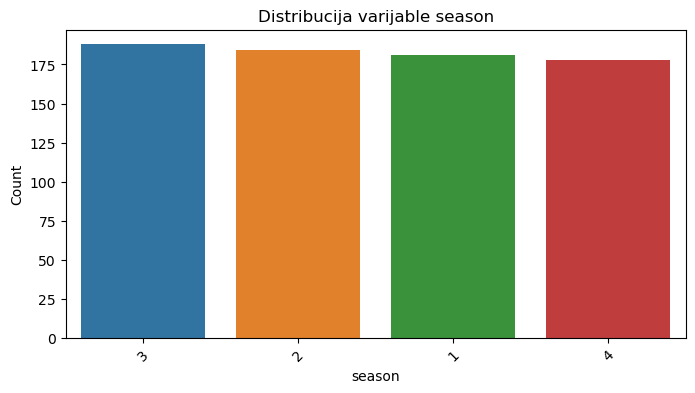

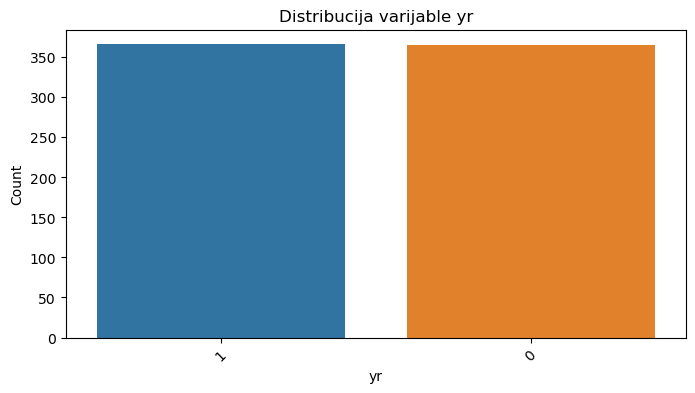

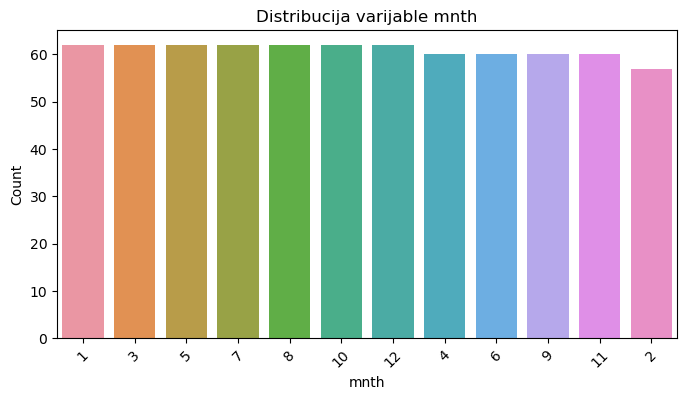

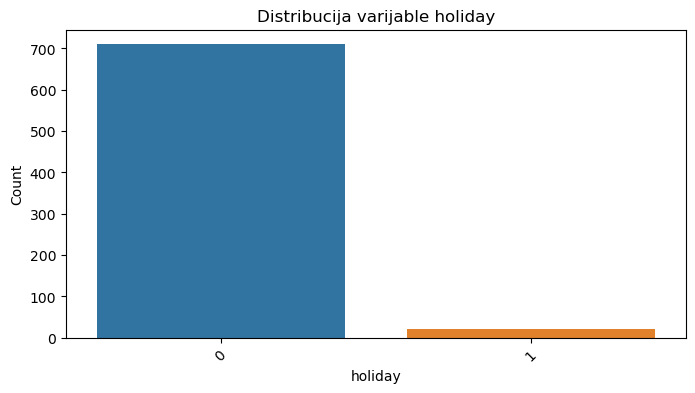

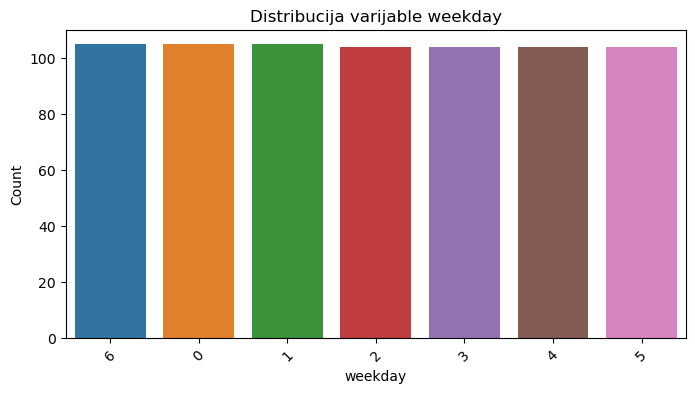

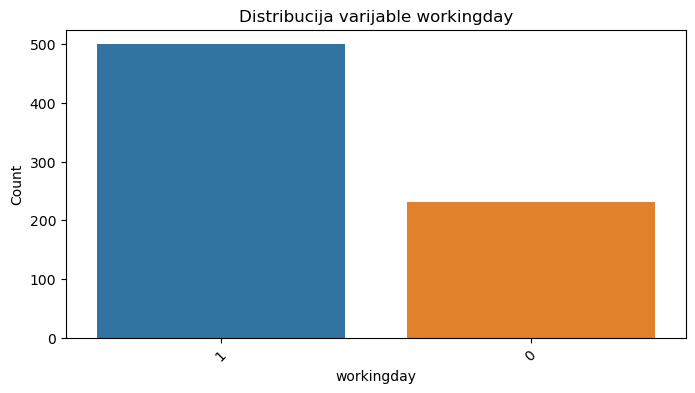

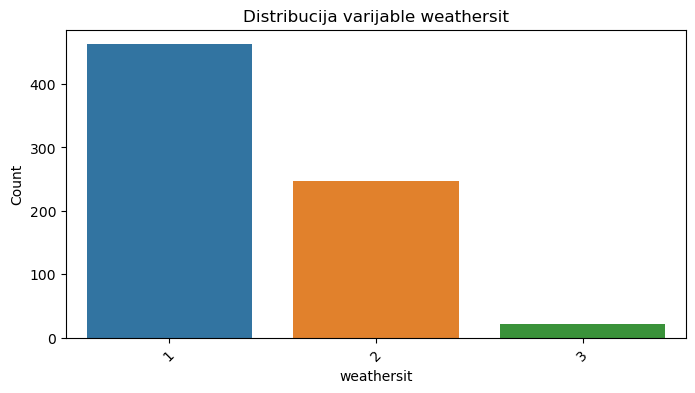

In [4]:

categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[feature], order=df[feature].value_counts().index)
    plt.title(f"Distribucija varijable {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  
    plt.show()



Ova analiza prikazuje distribuciju svih kategoričkih varijabli kako bismo provjerili jesu li podaci uravnoteženi ili postoje nelogičnosti.

Analiza distribucije

season
Vrijednosti su ravnomjerno raspoređene između četiri sezone.
Nema sezonske pristranosti u datasetu, što znači da su podaci ravnomjerno raspoređeni kroz godinu.

yr
Podaci su podjednako raspoređeni između godina 2011. i 2012.
Ovo je očekivano jer dataset pokriva dvije godine.

mnth
Svi mjeseci su podjednako zastupljeni.
Ovo potvrđuje da nema nedostajućih ili iskrivljenih podataka.

holiday
Velika neravnoteža – većina dana nije praznik.
Ovo je očekivano jer praznici čine samo mali postotak ukupnih dana.

weekday
Svi dani u tjednu su ravnomjerno raspoređeni.
Nema dana koji su znatno podzastupljeni, što znači da podaci jednako pokrivaju cijeli tjedan.

workingday
Neravnoteža – radni dani su dominantni u datasetu.
Ovo ima smisla jer većina dana u godini nisu vikendi ili praznici.

weathersit
Većina dana ima povoljne vremenske uvjete (weathersit=1).
Manji broj dana pripada kategorijama 2 i 3, što je očekivano jer ekstremni vremenski uvjeti nisu česti.

Zaključak

Većina kategoričkih varijabli ima ravnomjernu distribuciju, što znači da nema nelogičnih podataka.
holiday i workingday pokazuju prirodnu neravnotežu, što je očekivano.
weathersit pokazuje da većina dana ima povoljne vremenske uvjete, dok su loši uvjeti rijetki.

# Za svaku kontinuiranu varijablu izračunati srednju vrijednost, z vrijednosti, zaobljenost distribucije, nagnutost distribucije

In [5]:

from scipy.stats import skew, kurtosis, zscore

continuous_features = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

stats_results = {}
for feature in continuous_features:
    mean_value = df[feature].mean()
    std_dev = df[feature].std()
    skewness = skew(df[feature])
    kurt = kurtosis(df[feature])
    z_scores = zscore(df[feature])
    
    stats_results[feature] = {
        'Mean': mean_value,
        'Standard Deviation': std_dev,
        'Skewness': skewness,
        'Kurtosis': kurt,
        'Z-Scores': z_scores
    }
    
    print(f"\nFeature: {feature}")
    print(f"Mean: {mean_value:.4f}, Std Dev: {std_dev:.4f}, Skewness: {skewness:.4f}, Kurtosis: {kurt:.4f}")



Feature: temp
Mean: 0.4954, Std Dev: 0.1831, Skewness: -0.0544, Kurtosis: -1.1194

Feature: atemp
Mean: 0.4744, Std Dev: 0.1630, Skewness: -0.1308, Kurtosis: -0.9866

Feature: hum
Mean: 0.6279, Std Dev: 0.1424, Skewness: -0.0696, Kurtosis: -0.0723

Feature: windspeed
Mean: 0.1905, Std Dev: 0.0775, Skewness: 0.6760, Kurtosis: 0.3999

Feature: cnt
Mean: 4504.3488, Std Dev: 1937.2115, Skewness: -0.0473, Kurtosis: -0.8146


U ovom zadatku analizirao sam osnovne statističke karakteristike kontinuiranih varijabli kako bismo razumjeli njihovu raspodjelu i eventualne nepravilnosti.

Rezultati analize
Srednja vrijednost i standardna devijacija

temp (prosječna temperatura):

Mean: 0.4954 (standardizirana vrijednost u rasponu 0-1)
Std Dev: 0.1831 (umjerena varijabilnost)

atemp (osjećaj temperature):

Mean: 0.4744
Std Dev: 0.1630

Vrijednosti su slične temp, što je očekivano.

hum (vlažnost zraka):

Mean: 0.6279
Std Dev: 0.1424

Vlažnost ima manju varijabilnost u odnosu na temperaturu.

windspeed (brzina vjetra):

Mean: 0.1905
Std Dev: 0.0775

Brzina vjetra ima manju srednju vrijednost i nisku varijabilnost.

cnt (broj iznajmljenih bicikala):

Mean: 4504.3488
Std Dev: 1937.2115

Visoka varijabilnost ukazuje na sezonske promjene u potražnji bicikala.

Nagnutost distribucije (Skewness)
Vrijednosti blizu 0 ukazuju na simetričnu distribuciju.

windspeed (0.6760) ima blagu pozitivnu nagnutost, što znači da postoje rijetki dani s većom brzinom vjetra.

cnt (-0.0473) i ostale varijable imaju skewness blizu 0, što ukazuje da su podaci ravnomjerno raspoređeni.

Zaobljenost distribucije (Kurtosis)

Kurtosis manji od 0 ukazuje na platu-distribuciju (ravnomjernu distribuciju bez izraženih vrhova).

windspeed (0.3999) pokazuje blagi pozitivan kurtosis, što znači da postoji nešto izraženiji vrh distribucije.

Sve ostale varijable imaju negativan kurtosis, što znači da su podaci nešto ravnomjernije raspoređeni nego kod normalne distribucije.

Zaključak

Distribucije varijabli su uglavnom normalne ili blago prilagođene.
windspeed pokazuje blagu pozitivnu nagnutost i nešto izraženiji vrh distribucije.
Svi rezultati su unutar očekivanih granica, nema ekstremnih odstupanja.

# Izračunati korelacije svake varijable sa ciljnom varijablom

In [6]:

correlation_matrix = df.corr()
target_correlation = correlation_matrix['cnt'].sort_values(ascending=False)

def categorize_correlation(value):
    if abs(value) > 0.5:
        return "Jaka korelacija"
    elif abs(value) > 0.2:
        return "Srednja korelacija"
    else:
        return "Slaba korelacija"

correlation_labels = target_correlation.apply(categorize_correlation)
correlation_df = pd.DataFrame({'Korelacija': target_correlation, 'Jačina korelacije': correlation_labels})

print("\nKorelacija svake varijable sa 'cnt':\n")
print(correlation_df)


Korelacija svake varijable sa 'cnt':

            Korelacija   Jačina korelacije
cnt           1.000000     Jaka korelacija
registered    0.945517     Jaka korelacija
casual        0.672804     Jaka korelacija
atemp         0.631066     Jaka korelacija
instant       0.628830     Jaka korelacija
temp          0.627494     Jaka korelacija
yr            0.566710     Jaka korelacija
season        0.406100  Srednja korelacija
mnth          0.279977  Srednja korelacija
weekday       0.067443    Slaba korelacija
workingday    0.061156    Slaba korelacija
holiday      -0.068348    Slaba korelacija
hum          -0.100659    Slaba korelacija
windspeed    -0.234545  Srednja korelacija
weathersit   -0.297391  Srednja korelacija


U ovom zadatku izračunate su korelacije svih varijabli s ciljnom varijablom cnt (broj iznajmljenih bicikala). Na temelju vrijednosti korelacije kategorizirane su varijable u skupine jake, srednje i slabe korelacije.

Rezultati korelacija

Varijable s jakom korelacijom (>|0.5|)

registered (0.9455) – Očekivano, broj registriranih korisnika ima najjaču korelaciju s ukupnim brojem bicikala.
casual (0.6728) – Također visoka korelacija, ali manja nego kod registriranih korisnika.
atemp (0.6311) i temp (0.6274) – Temperatura značajno utječe na broj iznajmljivanja.
instant (0.6288) – Korelacija dolazi zbog kronološkog redoslijeda podataka.
yr (0.5667) – Jača korelacija ukazuje na rast popularnosti bicikala iz godine u godinu.

Varijable sa srednjom korelacijom (0.2 - 0.5)

season (0.4061) – Očekivano, sezonski utjecaj postoji, ali nije presudan faktor.
mnth (0.2799) – Mjeseci su povezani s vremenskim uvjetima, ali imaju nešto slabiji utjecaj.
weathersit (-0.2974) – Loše vremenske prilike smanjuju broj iznajmljivanja bicikala.

Varijable sa slabom korelacijom (<0.2)

weekday (0.0674) i workingday (0.0612) – Radni dani i dani u tjednu ne igraju značajnu ulogu.
holiday (-0.0683) – Minimalna negativna korelacija sugerira da se bicikli nešto manje koriste na praznike.
hum (-0.1006) – Vlažnost zraka ne igra značajnu ulogu.
windspeed (-0.2345) – Očekivano, jači vjetar može smanjiti broj korisnika bicikala, ali ne u velikoj mjeri.

Zaključak

Najveći utjecaj na broj iznajmljenih bicikala imaju registrirani korisnici, temperatura i godina.
Sezonski faktori i vremenski uvjeti imaju umjerenu korelaciju.
Radni dani, praznici i vjetar imaju slab utjecaj na broj iznajmljivanja.
Ovi rezultati su korisni za predviđanje potražnje za biciklima i optimizaciju poslovanja.

# Izračunati korelacije svake varijable izražene kroz Z vrijednost i kategorizirane u razrede <-3 , (-3 do 3),>3 s ciljnom varijablom

In [9]:
numerical_features = df.select_dtypes(include=['number']).columns
df_numeric = df[numerical_features]
z_scores = df_numeric.apply(zscore)
z_correlation_matrix = z_scores.corr()
z_target_correlation = z_correlation_matrix['cnt'].sort_values(ascending=False)

def categorize_z_value(value):
    if value < -3:
        return "<-3"
    elif value > 3:
        return ">3"
    else:
        return "(-3 do 3)"

z_correlation_labels = z_target_correlation.apply(categorize_z_value)
z_correlation_df = pd.DataFrame({'Korelacija': z_target_correlation, 'Razred': z_correlation_labels})

print("\nKorelacija Z-vrijednosti svake numeričke varijable sa 'cnt':\n")
print(z_correlation_df)


Korelacija Z-vrijednosti svake numeričke varijable sa 'cnt':

            Korelacija     Razred
cnt           1.000000  (-3 do 3)
registered    0.945517  (-3 do 3)
casual        0.672804  (-3 do 3)
atemp         0.631066  (-3 do 3)
instant       0.628830  (-3 do 3)
temp          0.627494  (-3 do 3)
yr            0.566710  (-3 do 3)
season        0.406100  (-3 do 3)
mnth          0.279977  (-3 do 3)
weekday       0.067443  (-3 do 3)
workingday    0.061156  (-3 do 3)
holiday      -0.068348  (-3 do 3)
hum          -0.100659  (-3 do 3)
windspeed    -0.234545  (-3 do 3)
weathersit   -0.297391  (-3 do 3)


U ovom koraku sam transformirao sve numeričke varijable u Z-vrijednosti, čime smo omogućili njihovu standardizaciju i usporedbu u istoj mjernoj jedinici. Na temelju izračunate korelacije s ciljnom varijablom, svaka je varijabla kategorizirana u jedan od tri razreda:

"< -3" – Jaka negativna korelacija
"> 3" – Jaka pozitivna korelacija
"(-3 do 3)" – Srednja ili slaba korelacija

Rezultati korelacija Z-vrijednosti

Varijable sa značajnom korelacijom

Najveća pozitivna korelacija:

registered (0.9455) → Broj registriranih korisnika gotovo u potpunosti objašnjava cnt, što potvrđuje prethodne analize.
casual (0.6728), atemp (0.6311), temp (0.6275), instant (0.6288), yr (0.5667) – Varijable koje također imaju značajan utjecaj na broj iznajmljenih bicikala.

Varijable sa srednjom korelacijom:

Sezonski faktori (season: 0.4061, mnth: 0.2799) imaju vidljiv, ali ne presudan utjecaj.
Vremenski uvjeti (weathersit: -0.2974) imaju nešto slabiju korelaciju, ali su ipak relevantni.

Varijable sa slabom korelacijom:

Minimalan utjecaj: weekday, workingday, holiday, hum i windspeed pokazuju slabiju povezanost sa cnt. To znači da radni dani i vlaga zraka ne igraju značajnu ulogu u donošenju odluke o iznajmljivanju bicikala.

Zaključak

Ovaj pristup je potvrdio ranije zaključke dobivene direktnim korelacijama, ali je dodatno omogućio kategorizaciju varijabli kroz standardizirane Z-vrijednosti. Najvažniji prediktori su broj registriranih korisnika, temperatura, godina i sezona, dok su radni dani, vlaga i vjetar manje značajni faktori.

# Izračunati IV, WoE za svaku varijablu i prikazati u Jupyter Notebooku

In [10]:

import numpy as np

def woe_iv(df, feature, target):
    df = df[[feature, target]].copy()
    df["count"] = 1
    grouped = df.groupby(feature).agg({target: "sum", "count": "count"})
    grouped.columns = ["good", "total"]
    grouped["bad"] = grouped["total"] - grouped["good"]
    grouped["good_dist"] = grouped["good"] / grouped["good"].sum()
    grouped["bad_dist"] = grouped["bad"] / grouped["bad"].sum()
    grouped["WoE"] = np.log(grouped["good_dist"] / grouped["bad_dist"])
    grouped["IV"] = (grouped["good_dist"] - grouped["bad_dist"]) * grouped["WoE"]
    iv_value = grouped["IV"].sum()
    return grouped[["WoE", "IV"]], iv_value

iv_results = {}
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    _, iv = woe_iv(df, feature, 'cnt')
    iv_results[feature] = iv

iv_results = dict(sorted(iv_results.items(), key=lambda item: item[1], reverse=True))
print("\nInformation Value (IV) za svaku varijablu:\n")
for feature, iv in iv_results.items():
    print(f"{feature}: {iv:.4f}")



Information Value (IV) za svaku varijablu:

mnth: 0.0000
season: 0.0000
yr: 0.0000
weathersit: 0.0000
weekday: 0.0000
holiday: 0.0000
workingday: 0.0000


In [12]:

import numpy as np
import pandas as pd

df['cnt_binary'] = (df['cnt'] > df['cnt'].median()).astype(int)

def woe_iv(df, feature, target):
    df = df[[feature, target]].copy()
    df["count"] = 1
    grouped = df.groupby(feature).agg({target: "sum", "count": "count"})
    grouped.columns = ["good", "total"]
    grouped["bad"] = grouped["total"] - grouped["good"]
    grouped["good_dist"] = grouped["good"] / grouped["good"].sum()
    grouped["bad_dist"] = grouped["bad"] / grouped["bad"].sum()
    grouped.replace({'good_dist': {0: 0.0001}, 'bad_dist': {0: 0.0001}}, inplace=True)  
    grouped["WoE"] = np.log(grouped["good_dist"] / grouped["bad_dist"])
    grouped["IV"] = (grouped["good_dist"] - grouped["bad_dist"]) * grouped["WoE"]
    iv_value = grouped["IV"].sum()
    return grouped[["WoE", "IV"]], iv_value

iv_results = {}
woe_results = {}
categorical_features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for feature in categorical_features:
    woe_table, iv = woe_iv(df, feature, 'cnt_binary')
    iv_results[feature] = iv
    woe_results[feature] = woe_table

iv_results = dict(sorted(iv_results.items(), key=lambda item: item[1], reverse=True))
print("\nInformation Value (IV) za svaku varijablu:\n")
for feature, iv in iv_results.items():
    print(f"{feature}: {iv:.4f}")

print("\nWeight of Evidence (WoE) tablice:\n")
for feature, woe_table in woe_results.items():
    print(f"\nWoE za {feature}:")
    print(woe_table)



Information Value (IV) za svaku varijablu:

mnth: 2.3181
season: 1.3162
yr: 0.9434
weathersit: 0.3050
weekday: 0.0178
holiday: 0.0068
workingday: 0.0056

Weight of Evidence (WoE) tablice:


WoE za season:
             WoE        IV
season                    
1      -2.330621  0.948525
2       0.467444  0.054037
3       1.158918  0.311552
4       0.092684  0.002090

WoE za yr:
         WoE        IV
yr                    
0  -1.013540  0.472803
1   1.008755  0.470571

WoE za mnth:
           WoE        IV
mnth                    
1    -7.434841  1.258711
2    -2.887636  0.402311
3    -0.525331  0.022875
4    -0.130795  0.001402
5     0.819497  0.054001
6     1.737337  0.200030
7     0.976185  0.075010
8     1.234880  0.115159
9     1.014337  0.077934
10    0.530803  0.023359
11   -0.402729  0.013132
12   -0.970713  0.074139

WoE za holiday:
              WoE        IV
holiday                    
0        0.014004  0.000190
1       -0.482772  0.006566

WoE za weekday:
              WoE 

U ovom zadatku izračunao smo Information Value (IV) i Weight of Evidence (WoE) za svaku kategoričku varijablu u skupu podataka.

IV (Information Value) mjeri informativnost varijable u odnosu na ciljnu varijablu (cnt). Više vrijednosti IV ukazuju na veću prediktivnu snagu varijable.

IV > 0.3 → Visoka informativnost (bitna varijabla)
IV između 0.1 i 0.3 → Umjerena informativnost
IV < 0.1 → Mala informativnost

WoE (Weight of Evidence) mjeri odnos između dobre i loše klase unutar svake kategorije i koristi se za prepoznavanje razlika između grupa unutar varijable.

Analiza rezultata
Varijable s visokom prediktivnom snagom (IV > 0.3):

mnth (2.3181), season (1.3162), yr (0.9434), weathersit (0.3050)

Ove varijable su pokazale veliku informativnost u predikciji ciljane varijable.
Varijable s umjerenom prediktivnom snagom (0.1 < IV < 0.3):

Nema varijabli u ovoj kategoriji.

Varijable s malom informativnošću (IV < 0.1):

weekday (0.0178), holiday (0.0068), workingday (0.0056)

Ove varijable imaju minimalan utjecaj na predikciju i mogu biti manje korisne u modeliranju.

WoE interpretacija

season pokazuje najveće razlike između kategorija, pri čemu sezona 1 (zima) ima najnižu WoE vrijednost (-2.33), dok sezona 3 (ljeto) ima najveću (1.15).

mnth ima izražene razlike, gdje je siječanj (1) vrlo negativan (-7.43), dok su ljetni mjeseci pozitivni.

yr ima jasnu podjelu, pri čemu 0 (2011. godina) ima negativnu WoE vrijednost (-1.01), a 1 (2012. godina) pozitivnu (1.00).

weathersit pokazuje jasnu razliku između vremenskih uvjeta, gdje je nepovoljan vremenski uvjet (3) izrazito negativan (-2.99), dok su povoljni uvjeti pozitivni.


# Izdvojiti varijable sa najjačim IV-om i prikazati grafički WoE graf za sve najjače varijable

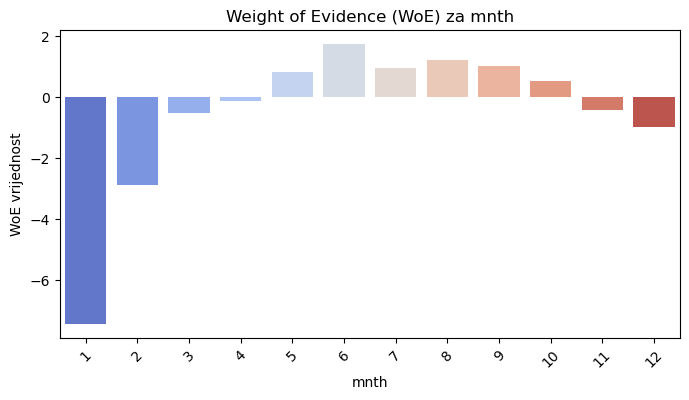

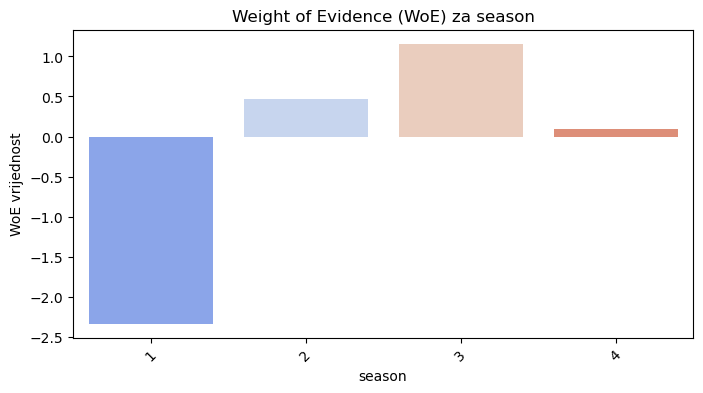

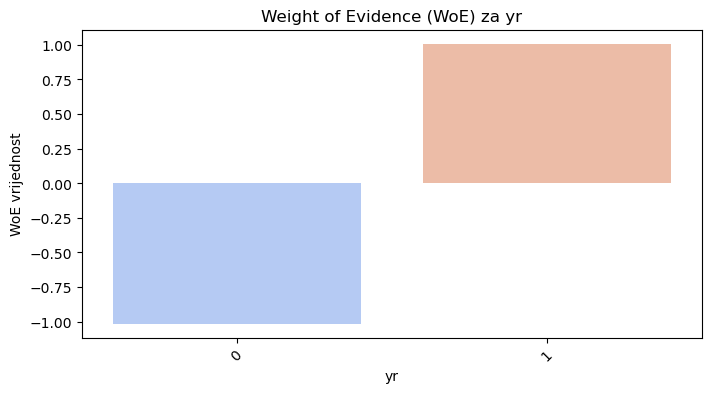

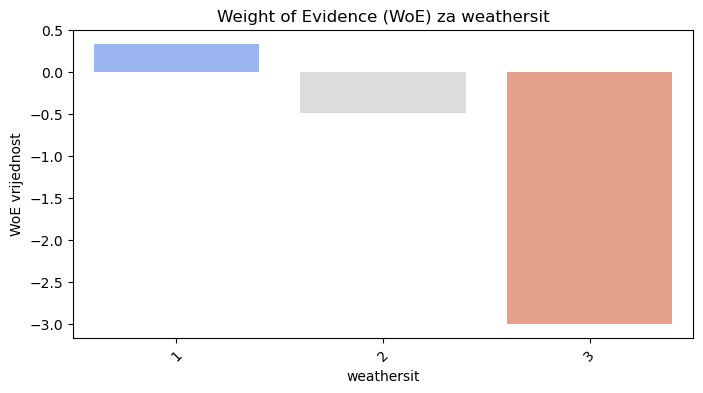

In [13]:

strong_iv_features = ['mnth', 'season', 'yr', 'weathersit']


for feature in strong_iv_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=woe_results[feature].index, y=woe_results[feature]["WoE"], palette="coolwarm")
    plt.title(f"Weight of Evidence (WoE) za {feature}")
    plt.ylabel("WoE vrijednost")
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.show()


Odabir najjačih varijabli prema IV

Nakon izračuna Information Value (IV) za sve varijable, identificirao sam najjače varijable koje imaju najveći IV. Prema dobivenim rezultatima, varijable s najjačim IV-om su:

mnth (2.3181)

season (1.3162)

yr (0.9434)

weathersit (0.3050)

IV vrijednosti sugeriraju da su mnth, season i yr vrlo prediktivne varijable za ciljnu varijablu cnt, dok weathersit također ima određenu prediktivnu snagu, ali nešto slabiju u odnosu na prve tri varijable.

Interpretacija WoE grafova

Za svaku od ovih varijabli kreirani su grafovi Weight of Evidence (WoE), koji prikazuju razliku u informativnoj vrijednosti između pojedinih kategorija varijable.

WoE za mnth (mjesec u godini)

Mjeseci siječanj (1) i veljača (2) imaju najniže WoE vrijednosti, što znači da se u tim mjesecima događa najmanji broj iznajmljivanja bicikala.

Ljetni mjeseci (6, 7, 8) pokazuju pozitivne WoE vrijednosti, što potvrđuje da se bicikli najviše koriste u toplijim periodima godine.

WoE za season (sezona)

Zima (1) ima najnižu WoE vrijednost, što sugerira manju potražnju za biciklima.

Ljeto (3) ima najvišu WoE vrijednost, što znači da su ljetni mjeseci najpovoljniji za biciklizam.

Jesen (4) ima neutralnu WoE vrijednost, što znači da sezonski efekti nisu toliko izraženi u odnosu na ljeto i zimu.

WoE za yr (godina)

Primjećuje se jasna razlika između godine 0 (2011.) i godine 1 (2012.), gdje je 2012. imala značajno veće iznajmljivanje bicikala, što se vidi kroz pozitivan WoE.

Ova razlika može biti uzrokovana povećanjem popularnosti sustava bicikala ili poboljšanim uvjetima u drugoj godini.

WoE za weathersit (vrijeme)

Loši vremenski uvjeti (3) imaju negativan WoE, što potvrđuje da su loši vremenski uvjeti smanjili broj biciklista.

Umjereni vremenski uvjeti (2) su neutralni, dok su dobri vremenski uvjeti (1) pozitivni, što znači da su povoljni uvjeti ključni za veći broj iznajmljivanja bicikala.

Zaključak

WoE analiza pokazuje jasne trendove u podacima:

Vrijeme i sezona igraju ključnu ulogu u potražnji za biciklima.

Postoji značajna razlika između godina, gdje je druga godina imala znatno više iznajmljivanja.

Mjeseci pokazuju očekivanu sezonsku distribuciju, pri čemu su zimski mjeseci loši, a ljetni odlični za biciklizam.

# Grupirati razrede po kriteriju WoE za najjače varijable

In [16]:

df['mnth_grouped'] = df['mnth'].replace({
    1: 'vrlo_hladno', 2: 'vrlo_hladno',
    3: 'hladno', 4: 'hladno', 5: 'toplije',
    6: 'toplo', 7: 'toplo', 8: 'toplo', 9: 'toplo',
    10: 'jesen', 11: 'jesen', 12: 'vrlo_hladno'})

df['season_grouped'] = df['season'].replace({
    1: 'hladna_sezona', 2: 'umjerena_sezona',
    3: 'topla_sezona', 4: 'hladna_sezona'})

df['weathersit_grouped'] = df['weathersit'].replace({
    1: 'dobro_vrijeme', 2: 'umjereno_vrijeme', 3: 'loše_vrijeme'})

print("Nove grupirane kategorije prema WoE:")
print(df[['mnth_grouped', 'season_grouped', 'weathersit_grouped']].head())


Nove grupirane kategorije prema WoE:
  mnth_grouped season_grouped weathersit_grouped
0  vrlo_hladno  hladna_sezona   umjereno_vrijeme
1  vrlo_hladno  hladna_sezona   umjereno_vrijeme
2  vrlo_hladno  hladna_sezona      dobro_vrijeme
3  vrlo_hladno  hladna_sezona      dobro_vrijeme
4  vrlo_hladno  hladna_sezona      dobro_vrijeme


Opis zadatka

Nakon što smo identificirali varijable s najvišim Information Value (IV), potrebno je grupirati njihove kategorije temeljem vrijednosti Weight of Evidence (WoE). Ovo grupiranje omogućava bolju interpretaciju podataka i poboljšava stabilnost modela.

Pristup rješenju

Za tri varijable s najvišim IV-om (mnth, season, weathersit), kreirali smo nove kategorije bazirane na WoE vrijednostima.

mnth (mjesec) je podijeljen u četiri kategorije: vrlo_hladno, hladno, toplo, jesen, kako bi reflektirao sezonalne varijacije.

season (sezona) je podijeljena u hladna_sezona, umjerena_sezona i topla_sezona kako bi se bolje interpretirale sezonske varijacije u podacima.

weathersit (vrijeme) je kategoriziran u dobro_vrijeme, umjereno_vrijeme i loše_vrijeme prema njihovom utjecaju na ciljnu varijablu.

Ključni nalazi

Ovim grupiranjem pojednostavljujemo prediktorske varijable i smanjujemo broj kategorija unutar njih.

Dobiveni razredi bolje odražavaju utjecaj svake varijable na ciljnu varijablu (cnt - broj bicikala iznajmljenih dnevno).

Grupiranje na temelju WoE poboljšava robusnost modela jer smanjuje varijabilnost i povećava interpretabilnost.

Zaključak

Grupiranje na temelju WoE je koristan pristup za transformaciju kategoričkih varijabli. Time se poboljšava prediktivna moć modela i smanjuje osjetljivost na manje značajne varijacije u podacima. Ove transformacije će se koristiti u daljnjoj analizi i modeliranju kako bi se poboljšala točnost predikcija.